In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential # model
from tensorflow.keras.layers import Activation, Dense, LeakyReLU # Type of layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from functions import *
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [36]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print("NUM GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

NUM GPUs Available:  1


In [37]:
df = pd.read_csv("assignment-files/wine.csv", index_col="index")
print(df.columns)
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
(6497, 12)
(5318, 12)


In [38]:
df["quality"] = df["quality"].apply(lambda x: splitting_up_good_and_bad(x))

In [39]:
print(df["quality"].value_counts())


1    3331
0    1987
Name: quality, dtype: int64


In [40]:
y = df["quality"].values
X = df.drop(["quality"], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, stratify=y, shuffle=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
model = Sequential([
    Dense(units=8, activation="relu", input_shape=(11,)),
    Dense(units=16, activation="tanh"),
    Dense(units=64, activation="relu"),
    Dense(units=2, activation="softmax")
])

In [42]:
learning_rate = 0.0001
loss = "sparse_categorical_crossentropy"
metrics = "accuracy"
model.compile(optimizer=Adam(learning_rate=learning_rate),
                             loss=loss, metrics=metrics)

In [43]:
history = model.fit(x=X_train, y=y_train, batch_size=10, epochs=500,
          verbose=2, validation_split=0.1)

Epoch 1/500
431/431 - 2s - loss: 0.6964 - accuracy: 0.5277 - val_loss: 0.6255 - val_accuracy: 0.6367
Epoch 2/500
431/431 - 1s - loss: 0.5987 - accuracy: 0.6408 - val_loss: 0.5881 - val_accuracy: 0.6493
Epoch 3/500
431/431 - 1s - loss: 0.5731 - accuracy: 0.6852 - val_loss: 0.5668 - val_accuracy: 0.6952
Epoch 4/500
431/431 - 1s - loss: 0.5582 - accuracy: 0.7086 - val_loss: 0.5541 - val_accuracy: 0.7203
Epoch 5/500
431/431 - 1s - loss: 0.5490 - accuracy: 0.7116 - val_loss: 0.5460 - val_accuracy: 0.7328
Epoch 6/500
431/431 - 1s - loss: 0.5429 - accuracy: 0.7172 - val_loss: 0.5410 - val_accuracy: 0.7307
Epoch 7/500
431/431 - 1s - loss: 0.5387 - accuracy: 0.7212 - val_loss: 0.5373 - val_accuracy: 0.7307
Epoch 8/500
431/431 - 1s - loss: 0.5353 - accuracy: 0.7230 - val_loss: 0.5345 - val_accuracy: 0.7349
Epoch 9/500
431/431 - 1s - loss: 0.5327 - accuracy: 0.7244 - val_loss: 0.5327 - val_accuracy: 0.7307
Epoch 10/500
431/431 - 1s - loss: 0.5304 - accuracy: 0.7281 - val_loss: 0.5316 - val_accura

In [44]:
model.save("models/categorical_.h5")

In [48]:
predictions = model.predict(x=X_test, batch_size=100)
rounded_predictions = np.argmax(predictions, axis=-1)
cm = confusion_matrix(y_test,rounded_predictions)
plot_labels = ["bad","good"]

[[127  72]
 [ 74 259]]


test loss, test acc: [0.5273357033729553, 0.7255638837814331]
(532,)


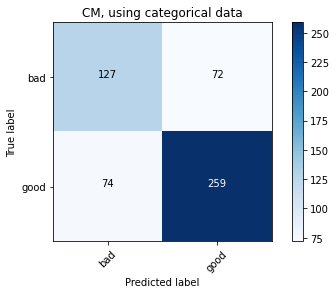

In [46]:
results = model.evaluate(X_test, y_test, batch_size=500, verbose=0)
print("test loss, test acc:", results)
print(y_test.shape)
plot_confusion_matrix(cm=cm, classes=plot_labels,
                      title= "CM, using categorical data")

Status at last epoch:test_score = 0.4480692446231842val_score  = 0.5028875470161438


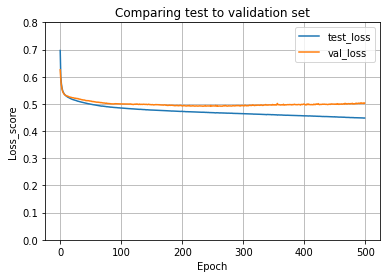

In [47]:
plot_and_print_loss(history)